# IRIS DATASET

## EDA

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## DATA VISUALIZATION

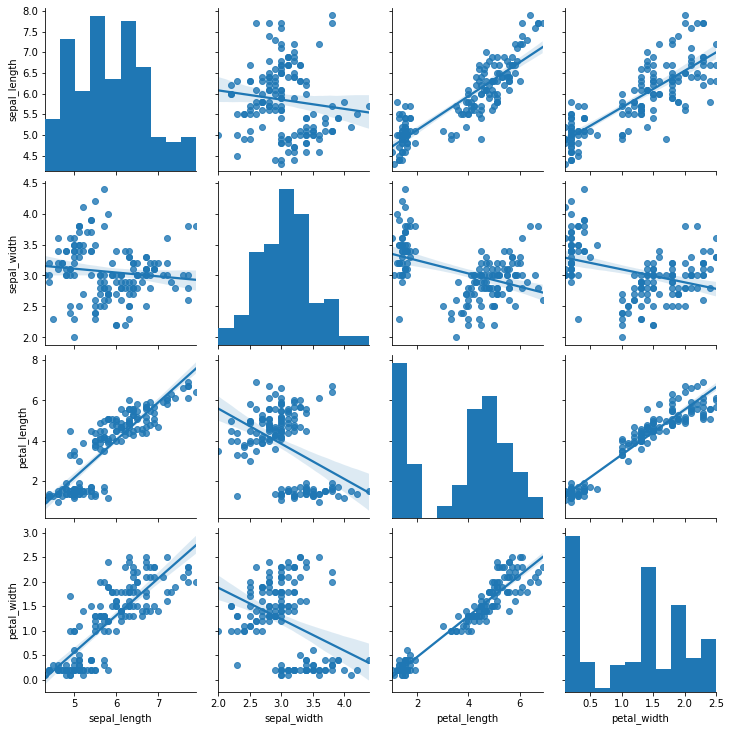

In [10]:
sns.pairplot(df,kind='reg')

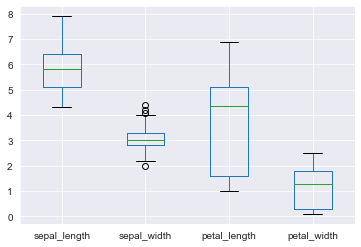

In [12]:
sns.set_style('darkgrid')
df.plot(kind='box')

c:\users\hrishikesh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


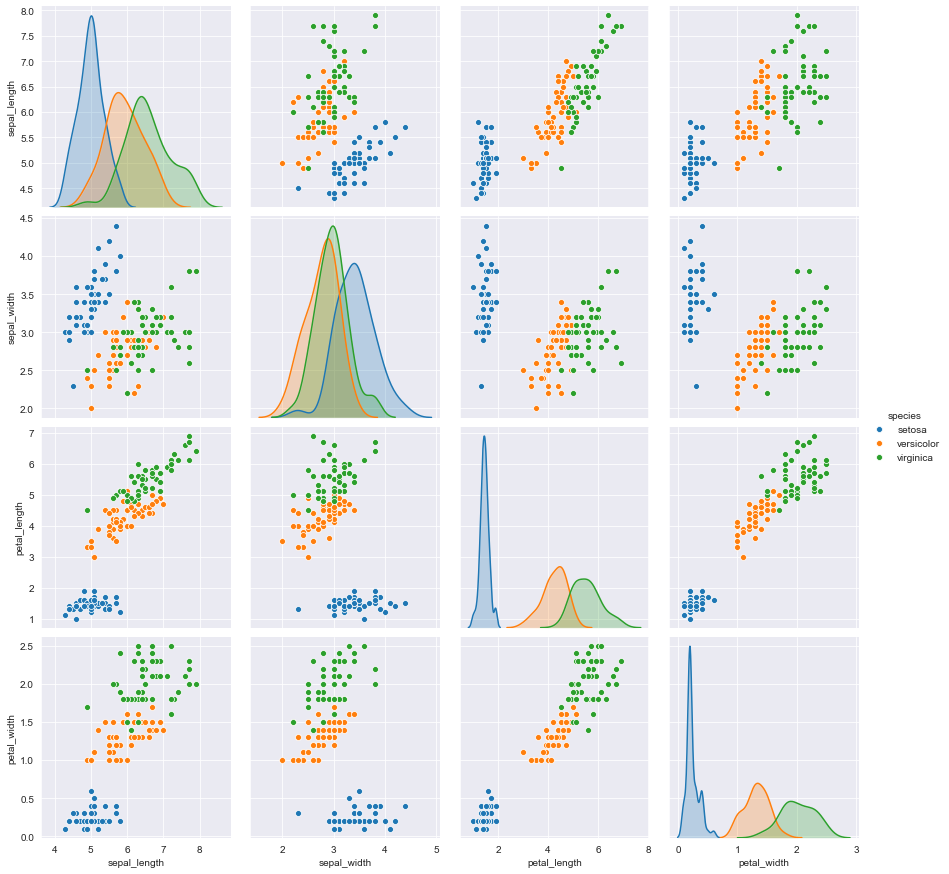

In [17]:
sns.pairplot(df, hue="species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10A33958>,
      dtype=object)

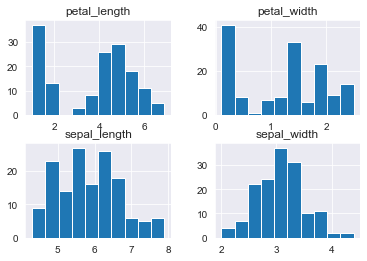

In [18]:
df.hist()

## PREDICTION

### KNeighborsClassifier

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [22]:
x=df.drop(['species'], axis=1)
y=df['species']
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, stratify=y)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.9666666666666667

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

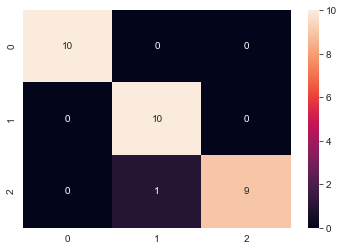

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

### GRID SEARCH CV

In [34]:
params = {'n_neighbors': np.arange(1, 50)}
knn2 = KNeighborsClassifier()
cv=GridSearchCV(knn, params, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [35]:
cv.best_params_

{'n_neighbors': 3}

In [37]:
cv.best_score_

0.975

### ADABOOST CLASSIFIER

In [44]:
from sklearn.ensemble.weight_boosting import AdaBoostClassifier

c:\users\hrishikesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.weight_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
ada = AdaBoostClassifier()

In [46]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [47]:
y_pred=ada.predict(X_test)
ada.score(X_test, y_test)

0.9333333333333333

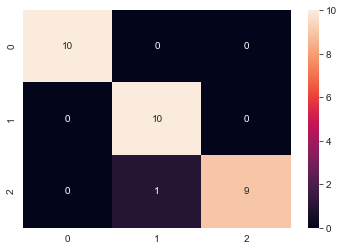

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

### GAUSSIAN NB

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb = GaussianNB()

In [50]:
gnb.fit(X_train,y_train)

GaussianNB()

In [51]:
y_pred=gnb.predict(X_test)
gnb.score(X_test, y_test)

0.9666666666666667

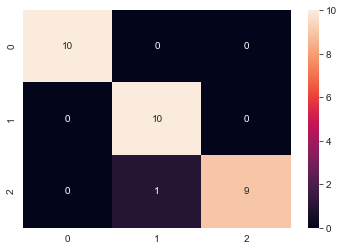

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")